# Create a Model

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pickle
import keras_tuner
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-04-20 17:46:49.252357: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9360] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-20 17:46:49.252405: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-20 17:46:49.252447: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1537] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-20 17:46:49.261078: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Load the Data

In [2]:
#load the data
with open("/share/jcorner_data/pkls/new_mode_svrimg/svrimg_new_mode_train.pkl", "rb") as f:
    (x_train, y_train) = pickle.load(f)

with open("/share/jcorner_data/pkls/new_mode_svrimg/svrimg_new_mode_validation.pkl", "rb") as f:
    (x_val, y_val) = pickle.load(f)

with open("/share/jcorner_data/pkls/new_mode_svrimg/svrimg_new_mode_test.pkl", "rb") as f:
    (x_test, y_test) = pickle.load(f)

num_classes = 4
input_shape = (136, 136, 1)

In [3]:
#Normalize by 80 dBZ
x_train = x_train.astype("float32") / 80
x_test = x_test.astype("float32") / 80
x_val = x_val.astype("float32") / 80

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_val.shape[0], "validate samples")
print(x_test.shape[0], "test samples")

x_train shape: (4560, 136, 136, 1)
4560 train samples
309 validate samples
920 test samples


In [4]:
#convert to useful information for keras
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
gpus = tf.config.experimental.list_physical_devices(device_type="GPU")
gpus

2024-04-20 17:46:51.660675: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-20 17:46:51.667499: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-20 17:46:51.667655: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Create the Model

In [6]:
model = keras.Sequential(
    [
        keras.Input(shape=(136, 136, 1)),
        layers.Conv2D(12, kernel_size=(9, 9), activation="relu"),
        layers.Conv2D(24, kernel_size=(9, 9), activation="relu"),
        layers.AveragePooling2D(pool_size=(5, 5)),
        layers.Conv2D(48, kernel_size=(9, 9), activation="relu"),
        layers.AveragePooling2D(pool_size=(5, 5)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

2024-04-20 17:46:51.692205: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-20 17:46:51.692343: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-20 17:46:51.692446: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 12)      984       
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 120, 24)      23352     
                                                                 
 average_pooling2d (Average  (None, 24, 24, 24)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 48)        93360     
                                                                 
 average_pooling2d_1 (Avera  (None, 3, 3, 48)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 432)               0

s-bus-pci#L344-L355
2024-04-20 17:46:51.832931: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-20 17:46:51.833047: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-20 17:46:51.833134: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1883] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7107 MB memory:  -> device: 0, name: GRID A100X-10C, pci bus id: 0000:04:00.0, compute capability: 8.0


In [7]:
#stop training early if loss stablizes for 5 epochs
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

#rotate/zoom into images to reduce overfitting
datagen = ImageDataGenerator(rotation_range=55, zoom_range=[0.9,1.0], fill_mode="reflect")

In [8]:
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=1e-3), metrics=["accuracy"])
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=100, validation_data=(x_val, y_val), workers=8, callbacks=[stop_early])


Epoch 1/100


2024-04-20 17:46:52.788549: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2024-04-20 17:46:53.109310: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f0554ddae00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-20 17:46:53.109347: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): GRID A100X-10C, Compute Capability 8.0
2024-04-20 17:46:53.114761: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-20 17:46:53.185027: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


143/143 [==============================] - 6s 32ms/step - loss: 0.8932 - accuracy: 0.6064 - val_loss: 0.7455 - val_accuracy: 0.6505
Epoch 2/100
143/143 [==============================] - 4s 27ms/step - loss: 0.6918 - accuracy: 0.7101 - val_loss: 0.7083 - val_accuracy: 0.6861
Epoch 3/100
143/143 [==============================] - 4s 26ms/step - loss: 0.6301 - accuracy: 0.7408 - val_loss: 0.8621 - val_accuracy: 0.6311
Epoch 4/100
143/143 [==============================] - 4s 25ms/step - loss: 0.5707 - accuracy: 0.7695 - val_loss: 0.4589 - val_accuracy: 0.8220
Epoch 5/100
143/143 [==============================] - 4s 25ms/step - loss: 0.4987 - accuracy: 0.7952 - val_loss: 0.3968 - val_accuracy: 0.8706
Epoch 6/100
143/143 [==============================] - 4s 25ms/step - loss: 0.4800 - accuracy: 0.8103 - val_loss: 0.3035 - val_accuracy: 0.8900
Epoch 7/100
143/143 [==============================] - 4s 26ms/step - loss: 0.4207 - accuracy: 0.8322 - val_loss: 0.3765 - val_accuracy: 0.8608
Epoc

### Check Model Abilities 

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.20166584849357605
Test accuracy: 0.9336956739425659


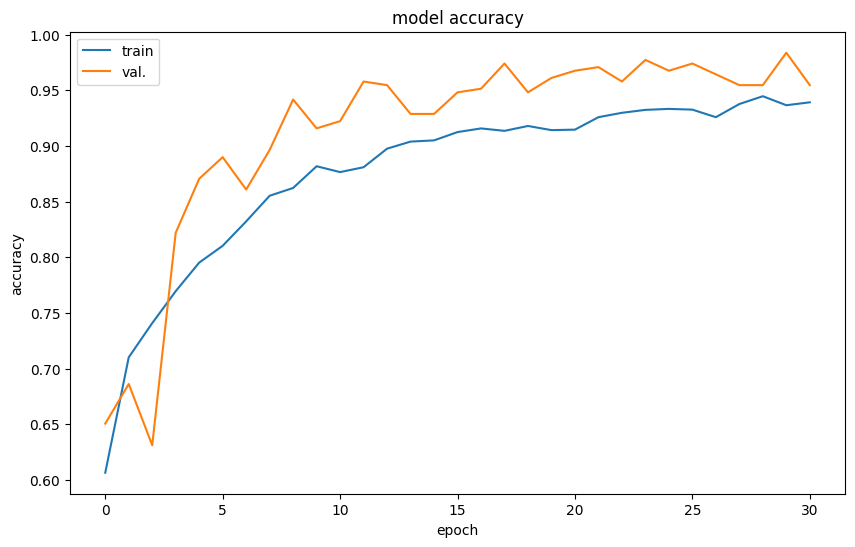

In [10]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 10, 6

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val.'], loc='upper left')
plt.show()

29/29 [==============================] - 0s 5ms/step
Confusion Matrix
[[133   9   0   0]
 [ 11 136   1   3]
 [  0  14 479  21]
 [  0   2   0 111]]
Classification Report
              precision    recall  f1-score   support

    Cellular       0.92      0.94      0.93       142
  Mixed Mode       0.84      0.90      0.87       151
      Linear       1.00      0.93      0.96       514
       Other       0.82      0.98      0.90       113

    accuracy                           0.93       920
   macro avg       0.90      0.94      0.92       920
weighted avg       0.94      0.93      0.94       920



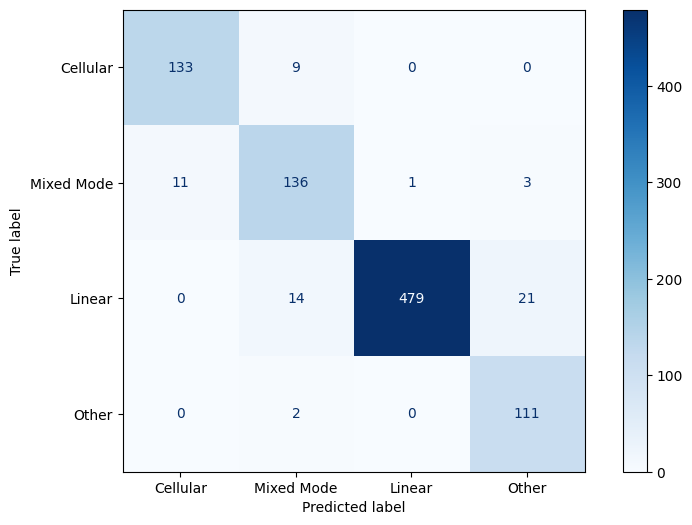

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_ = np.argmax(y_test, axis=1)

print('Confusion Matrix')
print(confusion_matrix(y_test_, y_pred))
print('Classification Report')
target_names = ['Cellular', 'Mixed Mode', 'Linear', 'Other']
print(classification_report(y_test_, y_pred, target_names=target_names))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_, y_pred), display_labels=target_names)
disp.plot(cmap='Blues')

In [12]:
#save the model
model.save("/share/jcorner_data/models/future_modes_v2.h5")